In [1]:
import pytesseract
import argparse
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

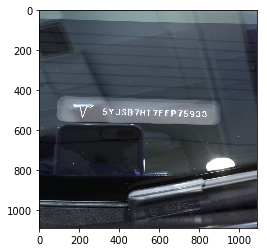

In [114]:
image1 = cv2.imread('vin12.jpg')  #14
image_copy1 = np.copy(image1)
standard_im1 = cv2.resize(image_copy1, (1100, 600))
plt.imshow(image_copy1, cmap='gray')

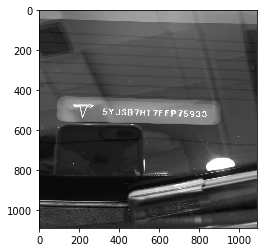

In [115]:
# Change color to RGB (from BGR)
image_copy1_gray = cv2.cvtColor(image_copy1, cv2.COLOR_BGR2GRAY)
plt.imshow(image_copy1_gray, cmap='gray')

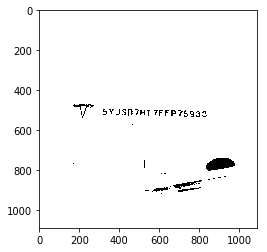

In [116]:
kernel = np.ones((5,5),np.uint8)

# Dilate the image
dilation = cv2.dilate(image_copy1_gray, kernel, iterations = 1)
closing = cv2.morphologyEx(image_copy1_gray, cv2.MORPH_CLOSE, kernel)

retval, binary = cv2.threshold(image_copy1_gray, 205, 255, cv2.THRESH_BINARY_INV)
#retval, binary = cv2.threshold(image_copy1_gray, 205, 255, cv2.THRESH_BINARY_INV)
#binary = cv2.threshold(image_copy1_gray, 255, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
binary = cv2.medianBlur(binary, 1)



plt.imshow(binary, cmap='gray')

#https://www.learnopencv.com/deep-learning-based-text-recognition-ocr-using-tesseract-and-opencv/

In [122]:
config = ('-l eng --oem 2 --psm 3')
config = ('-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890')
text = pytesseract.image_to_string(binary,config=config)
#text = pytesseract.image_to_string(binary)

In [123]:
print(text)

W 5YJSBYH17FFP75933
